## PCA Number

Find the Statistically Relevant number of PCAs for a dataset 

https://statisticallyrelevant.com/principal-component-analysis-in-python/



In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer(as_frame=True)
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
df = cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data_cols = df.drop(columns='target').columns.tolist()
print(f"Total of {len(data_cols)} features")

Total of 30 features


In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[data_cols])

In [6]:
pca = PCA()
fit_pca = pca.fit_transform(data_scaled)

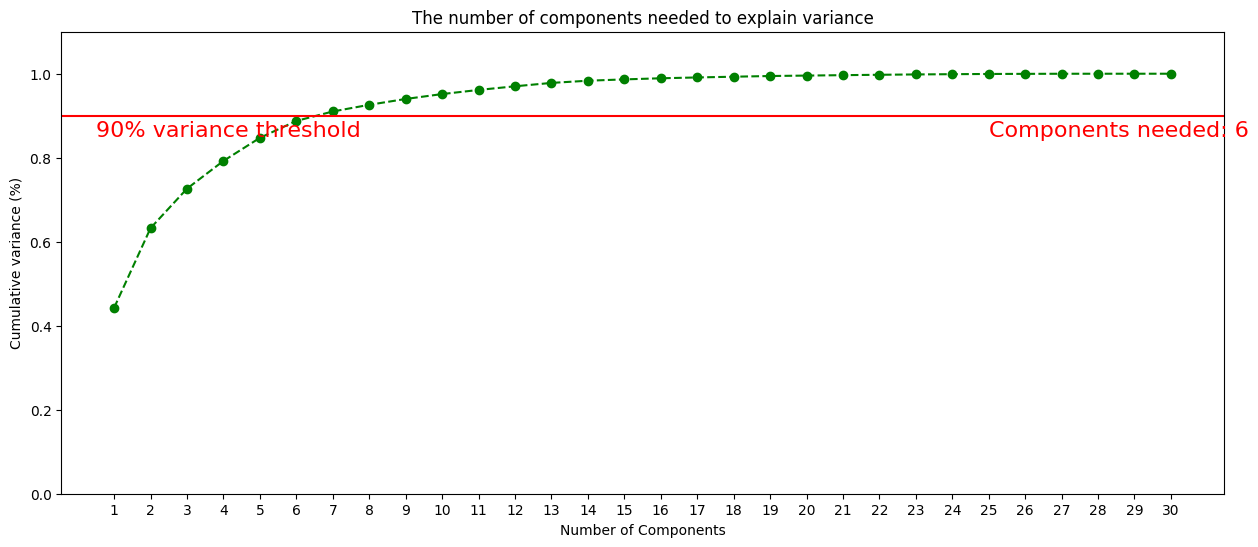

In [7]:
# Plot the cumulative variance for each component
plt.figure(figsize = (15, 6))
components = np.arange(1, 31, step=1)
variance = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 31, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% variance threshold', color = 'red', fontsize=16)
plt.text(25, 0.85, "Components needed: "+str(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0]), color = "red", fontsize=16)
plt.show()

## Full Data vs Optimized PCAs

In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y = df['target'].values

### Full Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, y, test_size=0.33, random_state=42)

In [ ]:
model = XGBRegressor()
